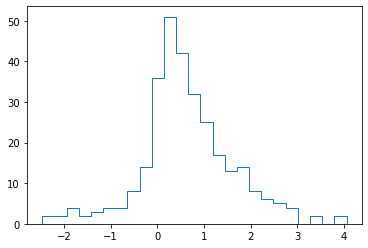

Bootstrapping estimation
Percentiles [0.52173512 0.74480529]

Jacknife estimation 
jk =  2.0268438341866615
jkVar =  0.02132087456958127


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


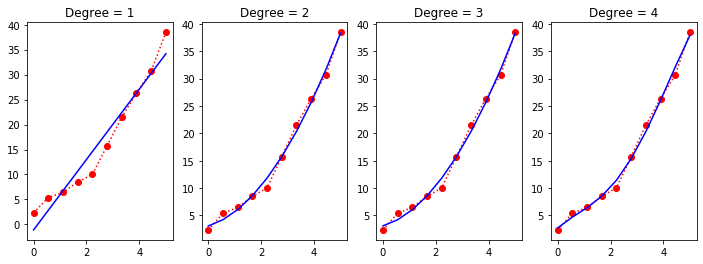


Direct RSS selection
Degree = 1, RSS=71.13
Degree = 2, RSS=7.97
Degree = 3, RSS=7.97
Degree = 4, RSS=6.62

LOOCV selection
Degree = 1, RSS=743.31
Degree = 2, RSS=84.94
Degree = 3, RSS=98.97
Degree = 4, RSS=178.60


In [1]:


# Bootstrapping
#%%

import numpy as np
import matplotlib.pyplot as plt

# Estimate the 95% confidence interval for the mean of this data set without knowing how it was generated

x = np.concatenate([np.random.exponential(size=200), np.random.normal(size=100)])
plt.hist(x, 25, histtype='step')
plt.show()

n = len(x)
reps = 10000
xb = np.random.choice(x, (n, reps))
mb = xb.mean(axis=0)
mb.sort()

perc = np.percentile(mb, [2.5, 97.5])
print('Bootstrapping estimation')
print('Percentiles' , perc)

#%%

# Jackknife

# Jackknife estimate of the estimator func
def jackknife(x, func):
    n = len(x)
    idx = np.arange(n)
    return np.sum(func(x[idx!=i]) for i in range(n))/float(n)

# Jackknife estiamte of the variance of the estimator func
def jackknifeVar(x, func):
    n = len(x)
    idx = np.arange(n)
    j_est = jackknife(x, func)
    return (n-1)/(n + 0.0) * np.sum((func(x[idx!=i]) - j_est)**2.0 for i in range(n))

x = np.random.normal(0, 2, 100)
jk = jackknife(x, np.std)
jkVar = jackknifeVar(x, np.std)
print("\nJacknife estimation ")
print('jk = ', jk)
print('jkVar = ', jkVar)


# LOOCV (leave one out cross-validation)
# Define function and variable space
a, b, c = 1, 2, 3
x = np.linspace(0, 5, 10)
y = a*x**2 + b*x + c + np.random.normal(0, 1, len(x))

# Plot polynomial models
plt.figure(figsize=(12,4))
for deg in range(1, 5):
    plt.subplot(1, 4, deg)
    beta = np.polyfit(x, y, deg)
    plt.plot(x, y, 'r:o')
    plt.plot(x, np.polyval(beta, x), 'b-')
    plt.title('Degree = %d' % deg)
plt.show()

def loocv(x, y, fit, pred, deg):
    """LOOCV RSS for fitting a polynomial model."""
    n = len(x)
    idx = np.arange(n)
    rss = np.sum([(y - pred(fit(x[idx!=i], y[idx!=i], deg), x))**2.0 for i in range(n)])
    return rss

# RSS does not detect overfitting and selects the most complex model
print('\nDirect RSS selection')
for deg in range(1, 5):
    print('Degree = %d, RSS=%.2f' % (deg, np.sum((y - np.polyval(np.polyfit(x, y, deg), x))**2.0)))

# LOOCV selects the correct model
print('\nLOOCV selection')
for deg in range(1, 5):
    print('Degree = %d, RSS=%.2f' % (deg, loocv(x, y, np.polyfit, np.polyval, deg)))


